In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## EXPLIANATORY DATA ANALIST

In [4]:
data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [5]:
data["Additional_Info"].value_counts()/len(data["Additional_Info"])*100

Additional_Info
No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: count, dtype: float64

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


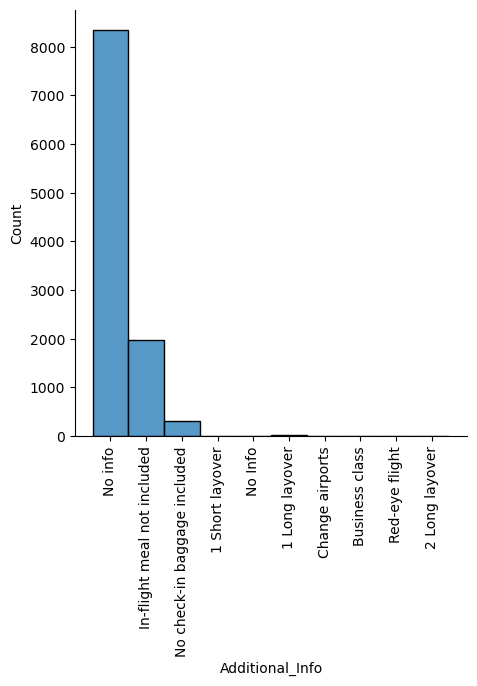

In [6]:
sns.displot(data["Additional_Info"])
plt.xticks(rotation=90)
plt.show()

### plot of price destribution

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


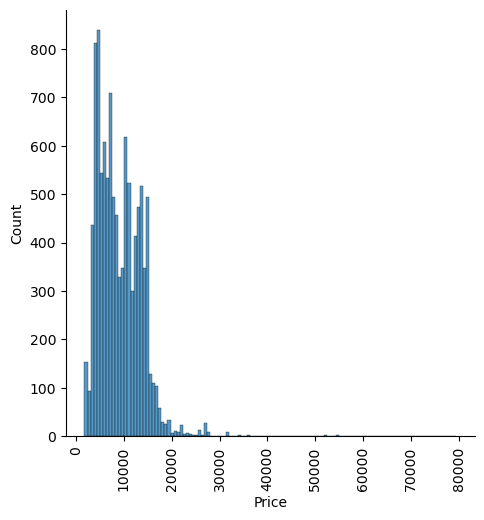

In [7]:
sns.displot(data["Price"])
plt.xticks(rotation=90)
plt.show()

In [8]:
data["Airline"].value_counts()/len(data["Airline"])*100

Airline
Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: count, dtype: float64

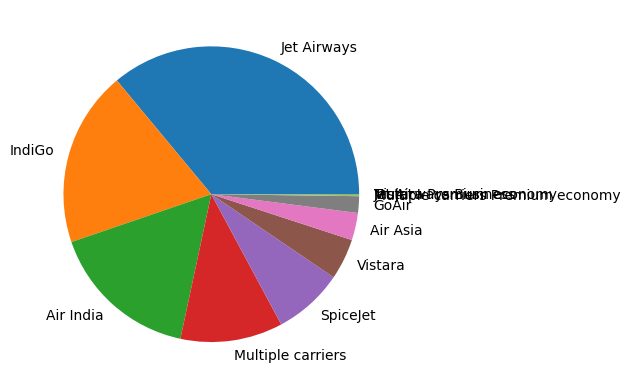

In [9]:
label=[
"Jet Airways",                          
"IndiGo",                       
"Air India",                            
"Multiple carriers",                    
"SpiceJet",                             
"Vistara",                               
"Air Asia",                              
"GoAir",                                 
"Multiple carriers Premium economy",     
"Jet Airways Business",                  
"Vistara Premium economy",              
"Trujet",]
plt.pie(data["Airline"].value_counts()/len(data["Airline"])*100,labels=label)
plt.show()

In [10]:
data["Duration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Duration
Non-Null Count  Dtype 
--------------  ----- 
10683 non-null  object
dtypes: object(1)
memory usage: 83.6+ KB


In [11]:
price_mean=data["Price"].mean()
price_std=data["Price"].std()
price_mean,price_std

(9087.064120565385, 4611.35916681709)

In [12]:
def convert_to_minutes(time_str):
    try:
        if 'h' in time_str and 'm' in time_str:
            hours, minutes = time_str.split('h')
            minutes = minutes.replace('m', '')  
            total_minutes = int(hours) * 60 + int(minutes)
        elif 'm' in time_str:
            minutes = time_str.replace('m', '') 
            total_minutes = int(minutes)
        elif 'h' in time_str:
            hours = time_str.replace('h', '') 
            total_minutes = int(hours)*60
        else:
            total_minutes = 0 

        return total_minutes
    except Exception as e:
        print(f"Error processing {time_str}: {e}")
        return None  

In [13]:
data['traveling_in_minutes'] = data["Duration"].apply(convert_to_minutes)

In [14]:
data["traveling_in_minutes"].unique()

array([ 170,  445, 1140,  325,  285,  145,  930, 1265, 1530,  470,  795,
        155,  135,  730, 1595,  270, 1355, 1380, 1235,  310,  920,  175,
        800,  910,  345,  355,  805, 1320,  330,  625,  315,  150,  375,
        715,  665,  510, 1325,  165,  720,  965, 1195,  195, 1520,  180,
        975,  905,  390, 1505,  745, 1640,  615,  630,   90,   85, 1590,
        440,  810,  300, 1145,  890,  160, 1330,  575,  600, 1280, 1125,
        740, 1080,  555, 1050,  995,  735,  450, 1440,  535,  430,  870,
       1820,  900,  765,  610,  925,  845, 1215, 1390, 1090,  960,  140,
        480, 1015,  190,  840, 1430, 1300, 1275,  650,  495,  515,  710,
       1655,  505, 1255,  290,  490, 1465, 1415, 1545, 1570, 1730, 1515,
        560,  550,  185,  690,  570, 1055,  305, 1550, 1200,  780, 1105,
       1450,  295, 1535,  380, 1120, 1165, 1760,  545,  645,  700, 1375,
       2245, 1540,  835,  520, 1410,  755, 1455,   80,  660,  675,  875,
        775,  540,  460,  705, 1495, 1025, 1795, 13

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,traveling_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285


C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


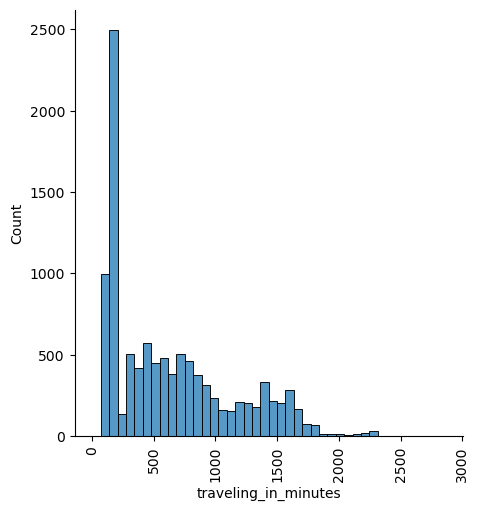

In [16]:
sns.displot(data["traveling_in_minutes"])
plt.xticks(rotation=90)
plt.show()

In [17]:
def select_date(date):
    data["year"]=pd.to_datetime(date).dt.year
    data["month"]=pd.to_datetime(date).dt.month_name()
    data["day"]=pd.to_datetime(date).dt.day
    data["day_of_the_week"]=pd.to_datetime(date).dt.day_name()

In [18]:
select_date(data["Date_of_Journey"])

C:\Users\salma\AppData\Local\Temp\ipykernel_10336\314007637.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["year"]=pd.to_datetime(date).dt.year
C:\Users\salma\AppData\Local\Temp\ipykernel_10336\314007637.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["month"]=pd.to_datetime(date).dt.month_name()
C:\Users\salma\AppData\Local\Temp\ipykernel_10336\314007637.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["day"]=pd.to_datetime(date).dt.day
C:\Users\salma\AppData\Local\Temp\ipykernel_10336\314007637.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


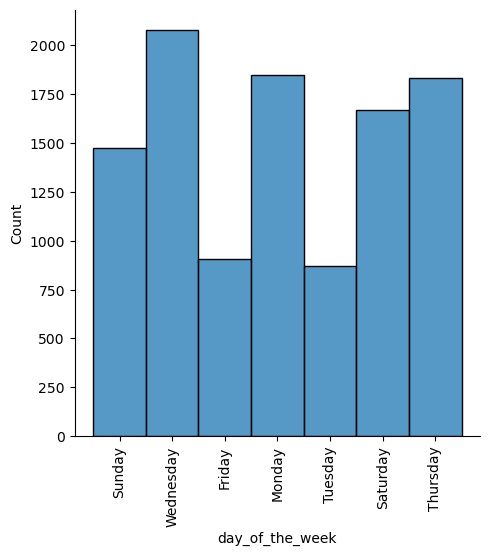

In [19]:
# day of the week
sns.displot(data["day_of_the_week"])
plt.xticks(rotation=90)
plt.show()

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


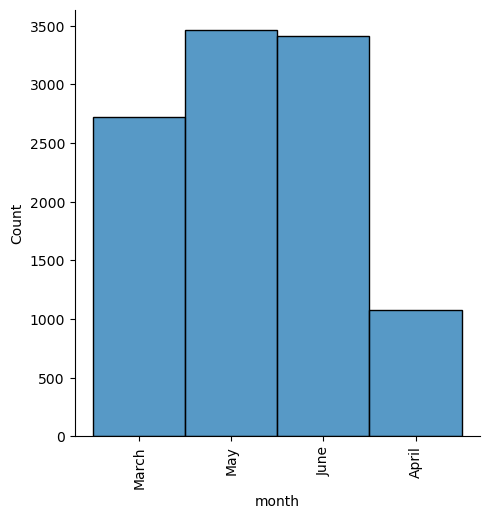

In [20]:
# distrubution of month
sns.displot(data["month"])
plt.xticks(rotation=90)
plt.show()

In [21]:
data["month"].unique()

array(['March', 'May', 'June', 'April'], dtype=object)

In [22]:
data["Dep_Time"]=pd.to_datetime(data["Dep_Time"]).dt.hour

C:\Users\salma\AppData\Local\Temp\ipykernel_10336\2647153070.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_Time"]=pd.to_datetime(data["Dep_Time"]).dt.hour


In [23]:
deletes=["Date_of_Journey","Route","Arrival_Time","Duration","year"]
data.drop(deletes,axis=1,inplace=True)

## get dummys and scale

In [26]:
data

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,traveling_in_minutes,month,day,day_of_the_week
0,IndiGo,Banglore,New Delhi,22,non-stop,No info,3897,170,March,24,Sunday
1,Air India,Kolkata,Banglore,5,2 stops,No info,7662,445,May,1,Wednesday
2,Jet Airways,Delhi,Cochin,9,2 stops,No info,13882,1140,June,9,Sunday
3,IndiGo,Kolkata,Banglore,18,1 stop,No info,6218,325,May,12,Sunday
4,IndiGo,Banglore,New Delhi,16,1 stop,No info,13302,285,March,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19,non-stop,No info,4107,150,April,9,Tuesday
10679,Air India,Kolkata,Banglore,20,non-stop,No info,4145,155,April,27,Saturday
10680,Jet Airways,Banglore,Delhi,8,non-stop,No info,7229,180,April,27,Saturday
10681,Vistara,Banglore,New Delhi,11,non-stop,No info,12648,160,March,1,Friday


In [27]:
new_data=pd.get_dummies(data)
new_data.isna().sum()

Dep_Time                                        0
Price                                           0
traveling_in_minutes                            0
day                                             0
Airline_Air Asia                                0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_Multiple carriers Premium economy       0
Airline_SpiceJet                                0
Airline_Trujet                                  0
Airline_Vistara                                 0
Airline_Vistara Premium economy                 0
Source_Banglore                                 0
Source_Chennai                                  0
Source_Delhi                                    0
Source_Kolkata                                  0


In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
new_data[new_data.columns]=scaler.fit_transform(new_data)


In [29]:
new_data

,Dep_Time,Price,traveling_in_minutes,day,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,month_June,month_March,month_May,day_of_the_week_Friday,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
0,1.654259,-1.125548,-0.931583,1.237383,-0.175441,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,...,-0.685322,1.709329,-0.693004,-0.304962,-0.457648,-0.430451,2.499525,-0.454953,-0.297568,-0.491561
1,-1.303095,-0.309048,-0.390072,-1.475239,-0.175441,2.257787,-0.135998,-0.487741,-0.750475,-0.023706,...,-0.685322,-0.585025,1.442992,-0.304962,-0.457648,-0.430451,-0.400076,-0.454953,-0.297568,2.034337
2,-0.607247,1.039858,0.978475,-0.531719,-0.175441,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,...,1.459169,-0.585025,-0.693004,-0.304962,-0.457648,-0.430451,2.499525,-0.454953,-0.297568,-0.491561
3,0.958411,-0.622202,-0.626367,-0.177898,-0.175441,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,...,-0.685322,-0.585025,1.442992,-0.304962,-0.457648,-0.430451,2.499525,-0.454953,-0.297568,-0.491561
4,0.610487,0.914076,-0.705132,-1.475239,-0.175441,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,...,-0.685322,1.709329,-0.693004,3.279097,-0.457648,-0.430451,-0.400076,-0.454953,-0.297568,-0.491561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.132373,-1.080006,-0.970965,-0.531719,5.699915,-0.442912,-0.135998,-0.487741,-0.750475,-0.023706,...,-0.685322,-0.585025,-0.693004,-0.304962,-0.457648,-0.430451,-0.400076,-0.454953,3.360571,-0.491561
10679,1.306335,-1.071765,-0.961120,1.591203,-0.175441,2.257787,-0.135998,-0.487741,-0.750475,-0.023706,...,-0.685322,-0.585025,-0.693004,-0.304962,-0.457648,2.323146,-0.400076,-0.454953,-0.297568,-0.491561
10680,-0.781209,-0.402951,-0.911891,1.591203,-0.175441,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,...,-0.685322,-0.585025,-0.693004,-0.304962,-0.457648,2.323146,-0.400076,-0.454953,-0.297568,-0.491561
10681,-0.259323,0.772246,-0.951274,-1.475239,-0.175441,-0.442912,-0.135998,-0.487741,-0.750475,-0.023706,...,-0.685322,1.709329,-0.693004,3.279097,-0.457648,-0.430451,-0.400076,-0.454953,-0.297568,-0.491561


### TRAIN VALIDATE TEST SPLIT

In [30]:
from sklearn.model_selection import train_test_split
y=new_data['Price']
x=new_data.drop("Price",axis=1)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### GRID SEARCH

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')


param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [3, 6, 10],          
    'learning_rate': [0.01, 0.05, 0.1], 
    'subsample': [0.7, 0.8, 0.9],     
    'colsample_bytree': [0.7, 0.8, 0.9], 
    'gamma': [0, 0.1, 0.2],          
}

In [32]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [33]:
# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters from Grid Search: {best_params}")

# Train the best model with evaluation set
best_xgb_model = grid_search.best_estimator_

# Prepare evaluation set (validation data)
eval_set = [(x_train, y_train), (x_val, y_val)]  # Includes training and evaluation sets

# Fit the best model with evaluation during training

Best Hyperparameters from Grid Search: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.7}


### FITING MODEL AND TRAING

In [34]:
best_xgb_model.fit(x_train, y_train, 
                   eval_set=eval_set, 
                  )

[0]	validation_0-rmse:0.98183	validation_1-rmse:0.94538
[1]	validation_0-rmse:0.94457	validation_1-rmse:0.91125
[2]	validation_0-rmse:0.90887	validation_1-rmse:0.87739
[3]	validation_0-rmse:0.87250	validation_1-rmse:0.84529
[4]	validation_0-rmse:0.84558	validation_1-rmse:0.82096
[5]	validation_0-rmse:0.81516	validation_1-rmse:0.79252
[6]	validation_0-rmse:0.78418	validation_1-rmse:0.76535
[7]	validation_0-rmse:0.75443	validation_1-rmse:0.73997
[8]	validation_0-rmse:0.73039	validation_1-rmse:0.71738
[9]	validation_0-rmse:0.70584	validation_1-rmse:0.69650
[10]	validation_0-rmse:0.68209	validation_1-rmse:0.67741
[11]	validation_0-rmse:0.65895	validation_1-rmse:0.65809
[12]	validation_0-rmse:0.63638	validation_1-rmse:0.63862
[13]	validation_0-rmse:0.61582	validation_1-rmse:0.62131
[14]	validation_0-rmse:0.59662	validation_1-rmse:0.60609
[15]	validation_0-rmse:0.57729	validation_1-rmse:0.59002
[16]	validation_0-rmse:0.56349	validation_1-rmse:0.57798
[17]	validation_0-rmse:0.54639	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
prediction=best_xgb_model.predict(x_test)
best_xgb_model.score(x_test,y_test)

0.8764263979312834

### TESTING

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
mean=y.mean()

In [38]:
original_rmse=rmse*price_std
original_mse=mse*(price_std**2)

In [39]:
print(f'mse  : {original_mse}')
print(f'rmse : {original_rmse}')
print(f'originql target mean : {price_mean}')
print(f'percentage : {original_rmse/price_mean*100}%')



mse  : 2394130.963314494
rmse : 1547.2979555710963
originql target mean : 9087.064120565385
percentage : 17.02747922807466%


### EVALUATING

In [40]:
df=pd.DataFrame(data=x_test.columns,columns=["columns"])
df["features"]=best_xgb_model.feature_importances_
df=df.sort_values(by="features", ascending=False).head(20)

<Axes: xlabel='features', ylabel='columns'>

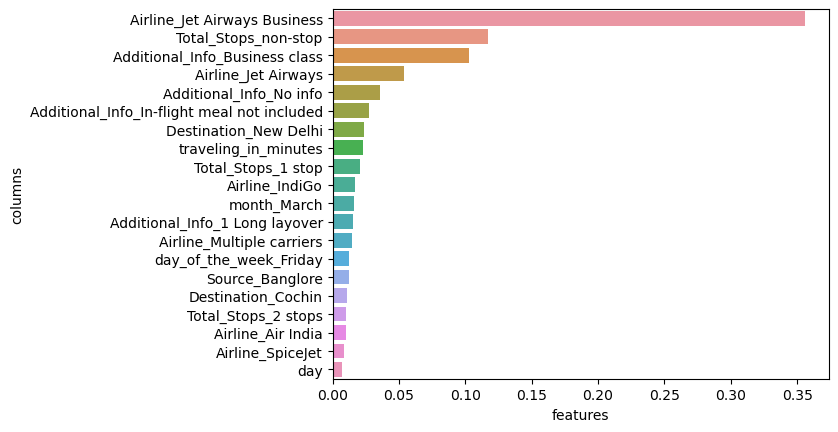

In [41]:
sns.barplot(data=df,x="features",y="columns")

### saving the data

In [42]:
import joblib
joblib.dump(best_xgb_model, 'best_xgb_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']